<a href="https://colab.research.google.com/github/yushunli2013/Sandbox/blob/master/NBA_2018_Playoff_Shooting_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages & Data

In [0]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [0]:
#Loading dataset
nba_df = pd.read_csv("https://raw.githubusercontent.com/yushunli2013/Test/master/playoff_shots.csv")
nba_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,41700131,149,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,24,...,Left Side Center(LC),24+ ft.,26,-168,206,1,0,20180415,CLE,IND
1,Shot Chart Detail,41700131,153,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,5,...,Center(C),Less Than 8 ft.,0,3,1,1,0,20180415,CLE,IND
2,Shot Chart Detail,41700131,155,2544,LeBron James,1610612739,Cleveland Cavaliers,1,0,58,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20180415,CLE,IND
3,Shot Chart Detail,41700131,187,2544,LeBron James,1610612739,Cleveland Cavaliers,2,11,8,...,Center(C),Less Than 8 ft.,1,-8,13,1,1,20180415,CLE,IND
4,Shot Chart Detail,41700131,195,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,22,...,Center(C),Less Than 8 ft.,1,2,10,1,1,20180415,CLE,IND


In [0]:
#Drop statistically irrelevant/identification columns
nba_df.drop(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'TEAM_ID', 'GAME_DATE'], inplace=True, axis=1)
nba_df.head(25)

,PLAYER_NAME,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,HTM,VTM
0,LeBron James,Cleveland Cavaliers,1,1,24,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-168,206,1,0,CLE,IND
1,LeBron James,Cleveland Cavaliers,1,1,5,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,3,1,1,0,CLE,IND
2,LeBron James,Cleveland Cavaliers,1,0,58,Missed Shot,Putback Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,-6,1,0,CLE,IND
3,LeBron James,Cleveland Cavaliers,2,11,8,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-8,13,1,1,CLE,IND
4,LeBron James,Cleveland Cavaliers,2,10,22,Made Shot,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,10,1,1,CLE,IND
5,LeBron James,Cleveland Cavaliers,2,7,37,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,22,-109,201,1,0,CLE,IND
6,LeBron James,Cleveland Cavaliers,2,7,7,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-8,5,1,1,CLE,IND
7,LeBron James,Cleveland Cavaliers,2,5,47,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,14,15,1,1,CLE,IND
8,LeBron James,Cleveland Cavaliers,2,5,21,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-7,20,1,1,CLE,IND
9,LeBron James,Cleveland Cavaliers,2,3,57,Missed Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,9,27,1,0,CLE,IND


# Visualize & Understand Data

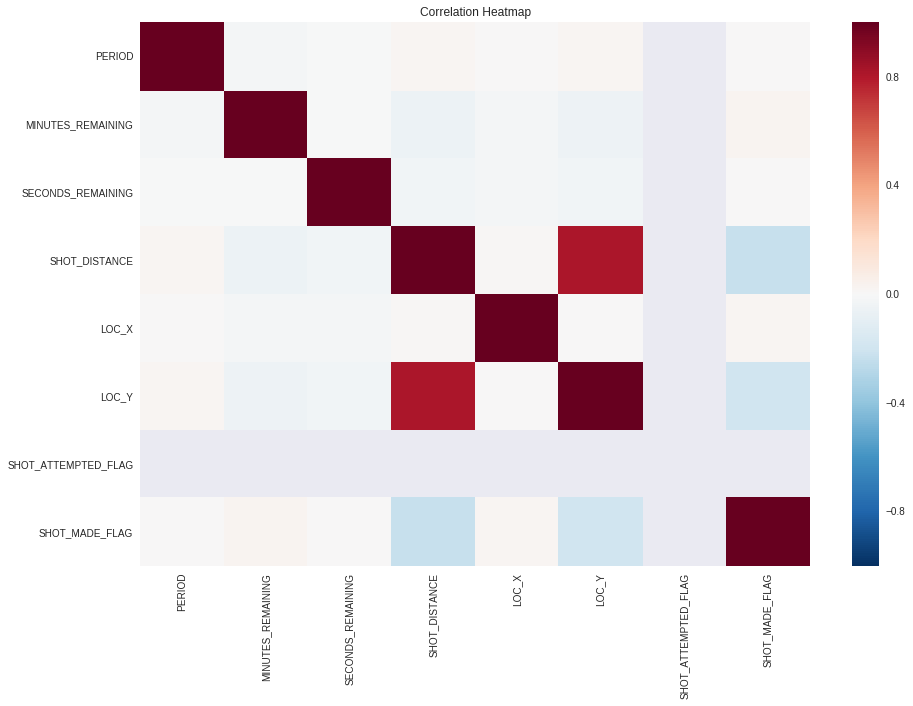

In [0]:
#define correlation of statistics
corr = nba_df.corr()
#create heatmap
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


This heatmap map shows very little correlation and insight, but this is not suprising given the context of the data.

The most telling insight is that **shot distance** is *negatively correlated* with the **% of being made** (shot_made_flag)

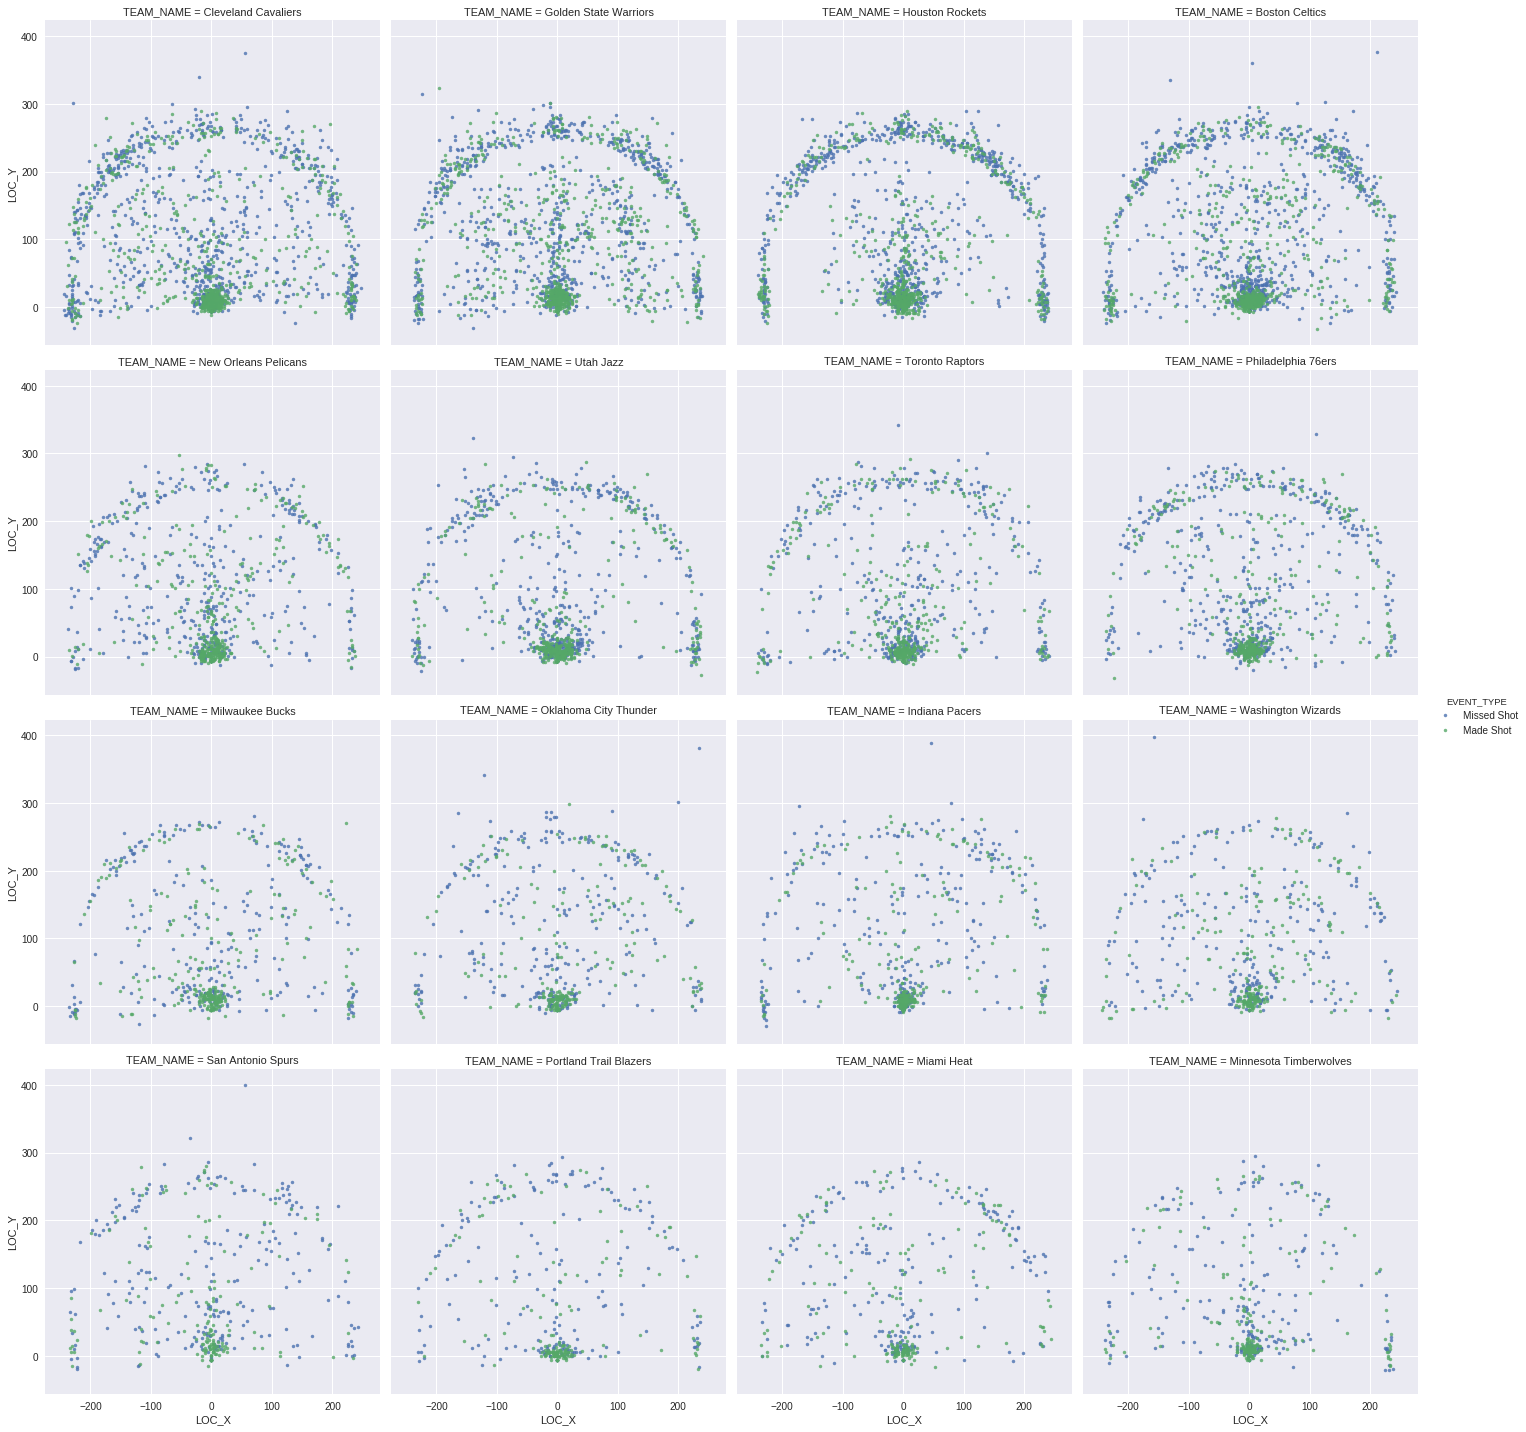

In [0]:
#In order to better understand the factors around made shots, we need to better visualize the Data

nba_shot_halfcourt_df = nba_df.query('LOC_Y<400')
#Filter shot data within the halfcourt, anything over 400 is an outlier

sns.lmplot('LOC_X', # Horizontal coordinate of shot
           'LOC_Y', # Vertical coordinate of shot
           col="TEAM_NAME", col_wrap= 4, #Display plot by team
           data=nba_shot_halfcourt_df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='EVENT_TYPE', legend=True,
           scatter_kws={"s": 12}) # S marker size


With these shot plots, we can generally see where teams generally shoot. also that teams that played more games

Also we can see that teams that have played more games (won more playoff series) have more shot data

# Cleaning Data for Machine Learning

In [0]:
#check for missing values
print(pd.isnull(nba_df).sum())

PLAYER_NAME            0
TEAM_NAME              0
PERIOD                 0
MINUTES_REMAINING      0
SECONDS_REMAINING      0
EVENT_TYPE             0
ACTION_TYPE            0
SHOT_TYPE              0
SHOT_ZONE_BASIC        0
SHOT_ZONE_AREA         0
SHOT_ZONE_RANGE        0
SHOT_DISTANCE          0
LOC_X                  0
LOC_Y                  0
SHOT_ATTEMPTED_FLAG    0
SHOT_MADE_FLAG         0
HTM                    0
VTM                    0
dtype: int64


In [0]:
#Reload original dataset to classify variables into numeric values
nba_shot_reload_df = pd.read_csv("https://raw.githubusercontent.com/yushunli2013/Test/master/playoff_shots.csv")
nba_shot_reload_df.drop(['GRID_TYPE', 'PLAYER_NAME', 'TEAM_NAME', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'HTM', 'VTM'], inplace=True, axis=1)
nba_shot_reload_df.head()

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,GAME_DATE
0,41700131,149,2544,1610612739,1,1,24,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-168,206,20180415
1,41700131,153,2544,1610612739,1,1,5,Missed Shot,Layup,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,3,1,20180415
2,41700131,155,2544,1610612739,1,0,58,Missed Shot,Layup,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,-6,20180415
3,41700131,187,2544,1610612739,2,11,8,Made Shot,Layup,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-8,13,20180415
4,41700131,195,2544,1610612739,2,10,22,Made Shot,Layup,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,10,20180415


In [0]:
#Quantify Shot_Type
shot_type_mapping = {'3PT Field Goal': 3, '2PT Field Goal': 2}
nba_shot_reload_df['SHOT_TYPE'] = nba_shot_reload_df['SHOT_TYPE'].map(shot_type_mapping)
nba_shot_reload_df['SHOT_TYPE'].head(5)

0    3
1    2
2    2
3    2
4    2
Name: SHOT_TYPE, dtype: int64

In [0]:
#Quantify Shot Zone Range
shot_zone_range_mapping = {'24+ ft.': 24, 'Less Than 8 ft.': 7, '16-24 ft.': 16, '8-16 ft.': 8, 'Back Court Shot': 50}
nba_shot_reload_df['SHOT_ZONE_RANGE'] = nba_shot_reload_df['SHOT_ZONE_RANGE'].map(shot_zone_range_mapping)
nba_shot_reload_df['SHOT_ZONE_RANGE'].head(5)

0    24
1     7
2     7
3     7
4     7
Name: SHOT_ZONE_RANGE, dtype: int64

In [0]:
#Quantify Shot Zone Area
shot_zone_area_mapping = {'Back Court(BC)': 0, 'Left Side(L)': 1, 'Left Side Center(LC)': 2, 'Center(C)': 3, 'Right Side Center(RC)': 4, 'Right Side(R)': 5}
nba_shot_reload_df['SHOT_ZONE_AREA'] = nba_shot_reload_df['SHOT_ZONE_AREA'].map(shot_zone_area_mapping)
nba_shot_reload_df['SHOT_ZONE_AREA'].head(5)

0    2
1    3
2    3
3    3
4    3
Name: SHOT_ZONE_AREA, dtype: int64

In [0]:
#Quantify Shot Zone Basic
shot_zone_basic_mapping = {'Backcourt': 0, 'Left Corner 3': 1,'Right Corner 3': 2, 'Above the Break 3': 3, 'Mid-Range': 4, 'In The Paint (Non-RA)': 5, 'Restricted Area': 6}
nba_shot_reload_df['SHOT_ZONE_BASIC'] = nba_shot_reload_df['SHOT_ZONE_BASIC'].map(shot_zone_basic_mapping)
nba_shot_reload_df['SHOT_ZONE_BASIC'].head(5)

0    3
1    6
2    6
3    6
4    6
Name: SHOT_ZONE_BASIC, dtype: int64

In [0]:
#Quantify Shot Type
shot_type_mapping = {'Jump Shot': 0, 'Dunk': 1,'Layup': 2, 'Hook': 3, 'Bank': 4, 'Fadeaway shot': 5}
nba_shot_reload_df['ACTION_TYPE'] = nba_shot_reload_df['ACTION_TYPE'].map(shot_type_mapping)
nba_shot_reload_df['ACTION_TYPE'].head(5)

0    0
1    2
2    2
3    2
4    2
Name: ACTION_TYPE, dtype: int64

In [0]:
#Preview updated dataframe
nba_shot_reload_df.head(25)

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,GAME_DATE
0,41700131,149,2544,1610612739,1,1,24,0,0,3,3,2,24,26,-168,206,20180415
1,41700131,153,2544,1610612739,1,1,5,0,2,2,6,3,7,0,3,1,20180415
2,41700131,155,2544,1610612739,1,0,58,0,2,2,6,3,7,0,0,-6,20180415
3,41700131,187,2544,1610612739,2,11,8,1,2,2,6,3,7,1,-8,13,20180415
4,41700131,195,2544,1610612739,2,10,22,1,2,2,6,3,7,1,2,10,20180415
5,41700131,242,2544,1610612739,2,7,37,0,0,2,4,2,16,22,-109,201,20180415
6,41700131,246,2544,1610612739,2,7,7,1,2,2,6,3,7,0,-8,5,20180415
7,41700131,263,2544,1610612739,2,5,47,1,2,2,6,3,7,2,14,15,20180415
8,41700131,266,2544,1610612739,2,5,21,1,2,2,6,3,7,2,-7,20,20180415
9,41700131,287,2544,1610612739,2,3,57,0,2,2,6,3,7,2,9,27,20180415


# Predicting Shot Outcome

In [0]:
#Split data to predict if the shot was made or missed
X = nba_shot_reload_df.drop('EVENT_TYPE', axis = 1)
y = nba_shot_reload_df['EVENT_TYPE']

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [0]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [0]:
#Predict through Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
# Check results
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

   Made Shot       0.65      0.46      0.54      1576
 Missed Shot       0.62      0.78      0.69      1792

   micro avg       0.63      0.63      0.63      3368
   macro avg       0.64      0.62      0.62      3368
weighted avg       0.63      0.63      0.62      3368



Using Random Forest, we are able to predict whether a shot would be made at over ***60%***. 

While this fgure is not extremely high, it could serve as an elementary block for NBA analytics. 